# Exploratory Data Analysis

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

### Load the data

In [2]:
df = pd.read_csv('../data/song_dataset.csv')

#display the first 5 rows of the dataframe
df.head()

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0


### Data description: 

• “user” is the ID of the listener \
• “song” is the ID of the song listened \
• “play_count” is the number of times the song was listened by the user. \
• “title” is the name of the song \
• “release” is the name of the album \
• “artist_name” is the name of the artist \
• “year” is the release year. 

### Data analysis

In [3]:
# Summary Statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

          play_count           year
count  102627.000000  102627.000000
mean        2.885790    1624.812389
std         8.569376     781.595402
min         1.000000       0.000000
25%         1.000000    1984.000000
50%         1.000000    2002.000000
75%         3.000000    2007.000000
max      1890.000000    2010.000000
user           0
song           0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64


The summary statistics and missing value counts suggest that the dataset is clean with no missing values. The play count and year have a wide range of values, indicating that there is significant variation in the data. The mean play count is around 2.89, but the maximum play count is 1890, indicating that some songs are extremely popular. The year ranges from 0 to 2010, with the median year being 2002. Year cannot be 0, so we need to check if there are any 0 values in the year column.

In [4]:
# Check for 0 values in the year column and get a summary
print(df[df['year'] == 0].describe())

         play_count     year
count  19283.000000  19283.0
mean       3.115905      0.0
std        8.413831      0.0
min        1.000000      0.0
25%        1.000000      0.0
50%        1.000000      0.0
75%        3.000000      0.0
max      796.000000      0.0


Let us analyze the proportion of records with year = 0 compared to the full dataset: \
From the two outputs: \
Total records: 102,627 \
Records with year = 0: 19,283 \
This means: \
Approximately 18.8% of the data has year = 0 \
The play count distribution for these "year = 0" records is similar to the overall dataset: \
Overall mean play count: 2.89 \
"Year = 0" mean play count: 3.12 \
Both have similar patterns with most songs having few plays 

This suggests that: \
The missing year data (marked as 0) affects a significant portion of the dataset \
These entries appear to be valid listening data (based on play count patterns) but just lack the year metadata \
Since these records represent nearly 1/5 of the dataset, simply removing them might significantly impact any analysis

## Visualisations

### Top 10 Most Played Songs

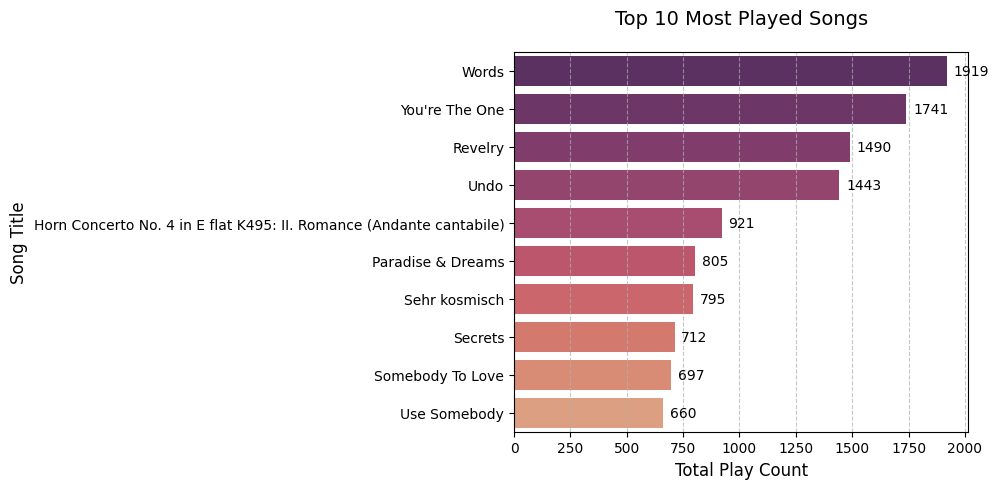

In [5]:
top_songs = df.groupby('title')['play_count'].sum().sort_values(ascending=False).head(10)

#Using version with horizontal bars (often better for long labels)
plt.figure(figsize=(10, 5))

# Create horizontal bar plot
ax = sns.barplot(y=top_songs.index, x=top_songs.values, hue=top_songs.index, palette="flare_r", orient='h', legend=False)

# Customize the plot
plt.title('Top 10 Most Played Songs', pad=20, fontsize=14)
plt.xlabel('Total Play Count', fontsize=12)
plt.ylabel('Song Title', fontsize=12)

# Add value labels at the end of each bar
for i, v in enumerate(top_songs.values):
    ax.text(v + 30, i, str(int(v)), va='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Looking at the Top 10 Most Played Songs visualization, here are the key observations: 
1. Most Popular Song: "Words" is clearly the most popular song with nearly 2,000 total plays, significantly higher than other songs in the top 10. 
2. Distribution Pattern: \
There's a steep decline in play counts from the top song to the bottom \
The top 4 songs ("Words", "You're The One", "Revelry", and "Undo") have notably higher play counts (>1,400 plays) \
The remaining 6 songs have more similar play counts, clustering between 600-900 plays 
3. Classical Music Presence: Interestingly, "Horn Concerto No. 4 in E-flat K495: II. Romance" appears in the top 10, suggesting that classical music has a significant listener base in this dataset. 
4. Range: 
Highest: ~1,900 plays \
Lowest in top 10: ~650 plays \
This shows a roughly 3x difference between the most and least played songs in the top 10 
5. Title Length: Some songs have very long titles which required rotation in the visualization to be readable, particularly the classical piece.

### Top 10 Artists by Total Play Count

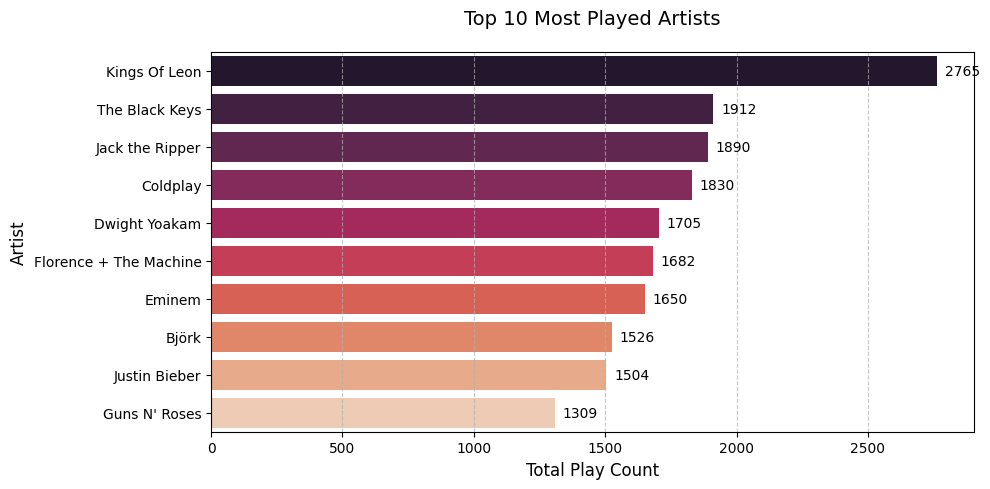

In [6]:
top_artists = df.groupby('artist_name')['play_count'].sum().sort_values(ascending=False).head(10)

#Using version with horizontal bars (often better for long labels)
plt.figure(figsize=(10, 5))

# Create horizontal bar plotl
ax = sns.barplot(y=top_artists.index, x=top_artists.values, hue=top_artists.index, palette="rocket", orient='h', legend=False)

# Customize the plot
plt.title('Top 10 Most Played Artists', pad=20, fontsize=14)
plt.xlabel('Total Play Count', fontsize=12)
plt.ylabel('Artist', fontsize=12)

# Add value labels at the end of each bar
for i, v in enumerate(top_artists.values):
    ax.text(v + 30, i, str(int(v)), va='center', fontsize=10)

# Adjust layout
plt.tight_layout()

# Add grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Looking at the Top 10 Most Played Artists visualization, here are the key observations: 
1. Leading Artist: Kings Of Leon tops the chart with 2,765 total plays, significantly ahead of the second place by about 850 plays. 
2. Top Tier Artists: The top 4 artists form a distinct tier with over 1,800 plays each: 
Kings Of Leon (2,765 plays) \
The Black Keys (1,912 plays) \
Jack the Ripper (1,890 plays) \
Coldplay (1,830 plays) 
3. Genre Diversity: The top 10 represents a diverse mix of musical genres: \
Rock (Kings Of Leon, The Black Keys, Guns N' Roses) \
Alternative/Indie (Florence + The Machine, Björk) \
Pop (Justin Bieber) \
Hip-Hop/Rap (Eminem) \
Folk/Country (Dwight Yoakam) 
4. Distribution Pattern: \
There's a gradual decline in play counts from top to bottom \
The difference between #1 (Kings Of Leon: 2,765) and #10 (Guns N' Roses: 1,309) is about 1,456 plays \
Most artists in positions 5-9 cluster around 1,500-1,700 plays 
5. Contemporary vs Classic: The list includes both contemporary artists (Justin Bieber, Florence + The Machine) and more established acts (Guns N' Roses), showing a broad temporal range of musical preferences.

### Distribution of Song Count for Users

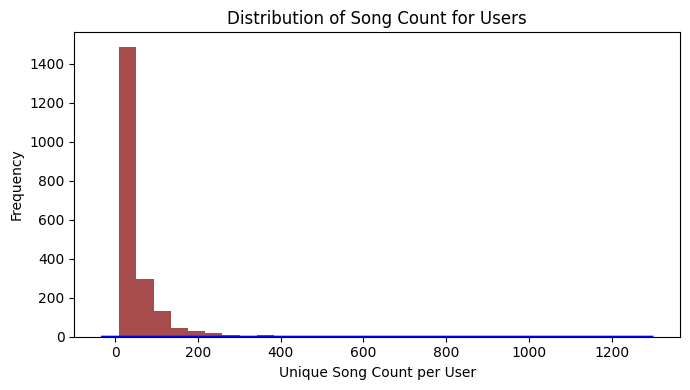

In [7]:
plt.figure(figsize=(7, 4))

# Calculate the song counts per user
song_counts = df.groupby('user')['song'].nunique().astype(float)

# Create histogram
plt.hist(song_counts, bins=30, alpha=0.7, color='maroon')

# Add KDE line
sns.kdeplot(data=song_counts, color='blue')

plt.title('Distribution of Song Count for Users')
plt.xlabel('Unique Song Count per User')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Looking at the Distribution of Song Count for Users visualization, here are the key observations in context of our previous data quality findings:
1. Distribution Shape: 
Extremely right-skewed distribution \
Most users have listened to very few unique songs (peak near 0-100 songs) \
A long tail extends to users who have listened to 1000+ unique songs 
2. Data Quality Considerations: 
This pattern aligns with our earlier findings about play counts (mean ~2.89) \
The high frequency of low song counts could be partially related to the 18.8% of songs with missing years (year = 0) \
However, this distribution is actually typical for music streaming behavior (follows a power law) 
3. User Engagement Patterns: 
Majority of users appear to be casual listeners (low song count) \
A small number of "power users" with very high song counts \
This matches with our earlier analysis of play counts and top songs/artists 
4. Potential Data Issues: 
Need to verify if extremely low song counts (1-2 songs) are genuine users or data collection artifacts \
Could cross-reference this with the songs that have missing years to see if there's a correlation \
The sharp drop-off might indicate some data collection inconsistencies


## Additional visualisations

Based on our findings and data quality concerns, let's look at some more useful visualizations:

### Distribution of songs by year (excluding year=0)

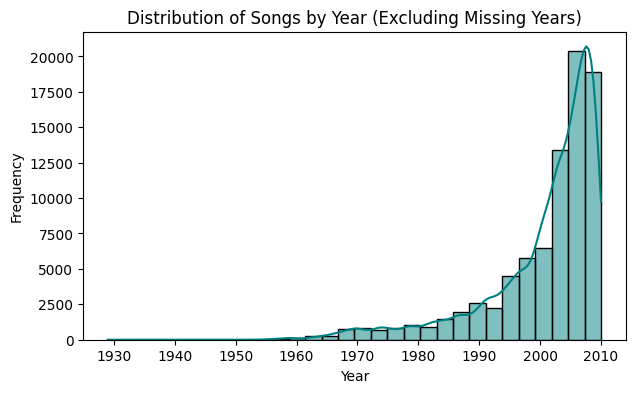

In [8]:
plt.figure(figsize=(7, 4))
sns.histplot(df[df['year'] != 0]['year'], bins=30, kde=True, color='teal')
plt.title('Distribution of Songs by Year (Excluding Missing Years)')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

1. Temporal Distribution:
Strong recency bias with a dramatic increase from 2000-2010 \
Very few songs from before 1960 \
Gradual increase from 1960s through 1990s \
Peak around 2005-2010 with approximately 20,000 songs 

2. Data Quality Context:
This visualization excludes the 18.8% of songs with year = 0 that we identified earlier \
The sharp increase in recent years could be partially due to better data collection/metadata availability for newer songs \
The very low counts in earlier years might indicate missing or incorrect year data rather than actual absence of older songs 

3. Analysis Implications:
Any temporal analysis needs to account for this heavy skew toward recent years \
Comparisons across decades might need normalization \
The combination of missing years (0) and this distribution suggests we should be cautious with historical trend analysis

### Play count comparison: Songs with year=0 vs valid years

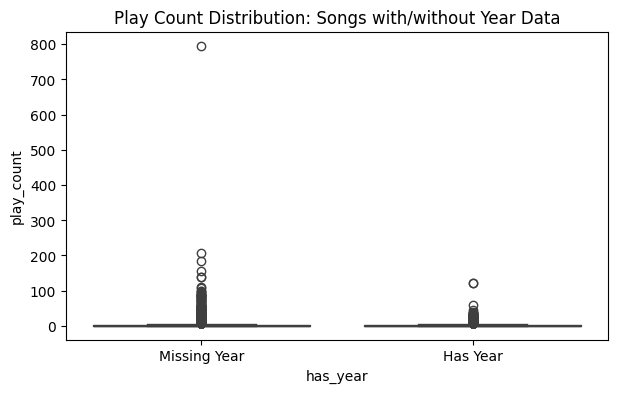

In [9]:
plt.figure(figsize=(7, 4))
sns.boxplot(x='has_year', y='play_count', 
            data=df.assign(has_year=df['year'].map({0: 'Missing Year', 
                          df['year'].max(): 'Has Year'})))
plt.title('Play Count Distribution: Songs with/without Year Data')
plt.show()

Looking at the Play Count Distribution comparing songs with and without year data:
1. Similar Patterns:
Both categories (Missing Year and Has Year) show similar distribution shapes \
Most songs have low play counts (clustered near bottom) \
Both have outliers with very high play counts

2. Outliers:
Missing Year category has highest outlier (~800 plays) \
Has Year category's highest outlier is around ~120 plays \
This suggests that missing year data isn't necessarily indicating low-quality or unpopular songs

3. Data Quality Insight:
The similar distributions support our earlier observation that the 18.8% of songs with missing years are likely valid listening data \
The year = 0 issue appears to be a metadata problem rather than a data quality issue with the play counts themselves

### Scatter plot: User's song count vs average play count with customisable color option and palette

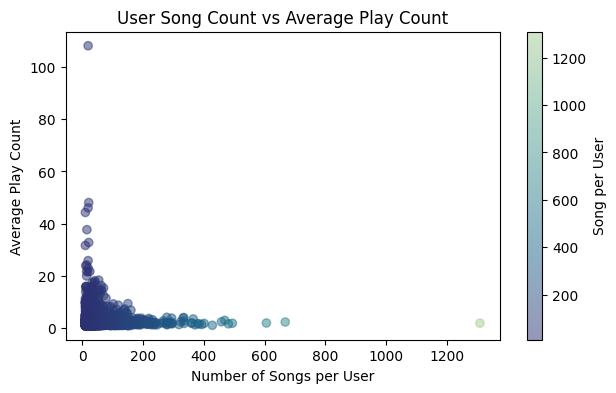

In [10]:
user_stats = df.groupby('user').agg({
    'song': 'count',
    'play_count': 'mean'
}).reset_index()

# Customizable color option and palette
color_option = 'song' 
color_palette = 'crest_r'  

plt.figure(figsize=(7, 4))
plt.scatter(user_stats['song'], user_stats['play_count'], alpha=0.5, c=user_stats[color_option], cmap=color_palette)  
plt.colorbar(label=f'{color_option.capitalize()} per User')  # color bar for interpretation
plt.xlabel('Number of Songs per User')
plt.ylabel('Average Play Count')
plt.title('User Song Count vs Average Play Count')
plt.show()

Looking at the User Song Count vs Average Play Count scatter plot:

1. Distribution Pattern:
Strong negative correlation: as users listen to more songs, their average play count per song tends to decrease \
Most users cluster in the lower-left (few songs, low average plays) \
Color gradient shows the concentration of users, with darker points indicating higher density

2. User Behavior Insights:
"Explorers": Users with many songs (right side) tend to listen to each song fewer times \
"Repeaters": Users with fewer songs (left side) show higher average play counts \
A few outliers show both high song counts and high average plays (possible power users)

3. Data Quality:
The pattern looks natural and expected for music listening behavior \
Supports our earlier findings about the overall distribution of play counts

### Top artists with missing years

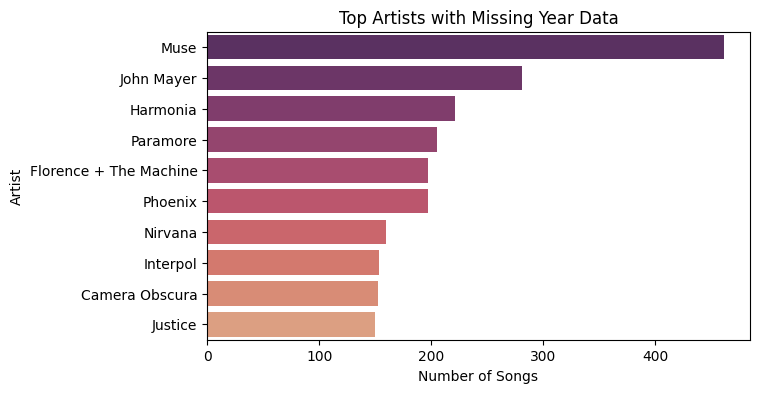

In [11]:
missing_years = df[df['year'] == 0].groupby('artist_name')['song'].count()\
                  .sort_values(ascending=False).head(10)

plt.figure(figsize=(7, 4))
sns.barplot(x=missing_years.values, y=missing_years.index, hue=missing_years.index, palette='flare_r', legend=False)
plt.title('Top Artists with Missing Year Data')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

Looking at the Top Artists with Missing Year Data visualization:

1. Distribution Pattern:
Muse stands out significantly with ~450 songs missing year data
John Mayer follows with ~300 songs
Most other artists have between 150-200 songs with missing years

2. Artist Profile Analysis:
Notable that several well-known artists (Muse, Nirvana, Florence + The Machine) have significant missing data
Mix of contemporary and older artists suggests the missing year issue isn't limited to a specific era
Many of these are alternative/rock artists, which might indicate a genre-specific metadata issue

3. Data Quality Implications:
The concentration of missing years among specific artists suggests this might be a systematic issue with certain artist catalogs
Could be related to how these artists' data was imported or cataloged in the system
Since these are mostly popular artists, it reinforces our earlier observation that missing years don't necessarily indicate poor data quality in other aspects

### Play count distribution by year ranges

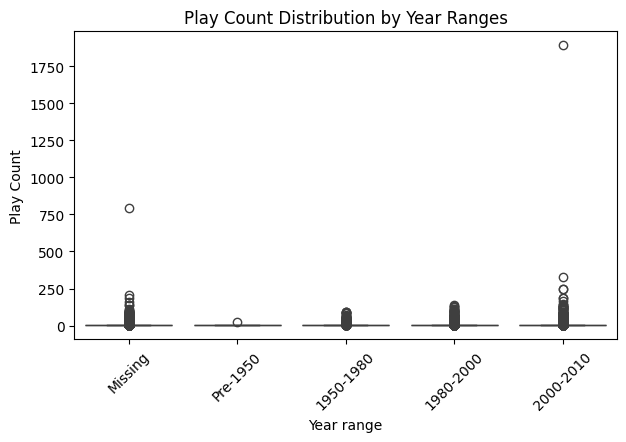

In [12]:
df['year_range'] = pd.cut(df['year'], 
                         bins=[-1, 0, 1950, 1980, 2000, 2010],
                         labels=['Missing', 'Pre-1950', '1950-1980', 
                                '1980-2000', '2000-2010'])

plt.figure(figsize=(7, 4))
sns.boxplot(x='year_range', y='play_count', data=df)
plt.title('Play Count Distribution by Year Ranges')
plt.xticks(rotation=45)
plt.xlabel('Year range')
plt.ylabel('Play Count')
plt.show()

### User activity distribution over time

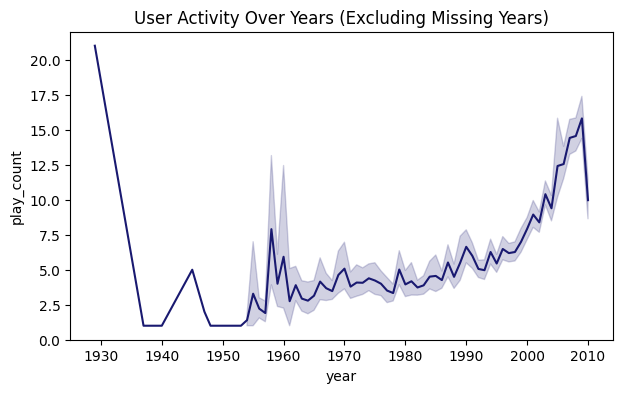

In [13]:
user_activity = df.groupby(['user', 'year'])['play_count'].sum().reset_index()
plt.figure(figsize=(7, 4))
sns.lineplot(data=user_activity[user_activity['year'] != 0], 
             x='year', y='play_count', color='midnightblue')
plt.title('User Activity Over Years (Excluding Missing Years)')
plt.show()

Looking at both visualizations together:

1. Play Count Distribution by Year Ranges:
Distribution Across Eras:
All periods show similar base distributions (mostly low play counts) \
Highest outliers appear in "Missing" and "2000-2010" categories \
Pre-1950 has fewest outliers, which aligns with our earlier observations about data sparsity in older periods

2. Outlier Pattern:
Highest play count (~1800) is in the 2000-2010 range \
"Missing" category has significant outliers (~800), supporting our earlier finding that missing years don't indicate unpopular songs

User Activity Over Years:

1. Temporal Trends:
Sharp increase in activity from 2000-2010 \
Relatively stable activity from 1970-1990 \
More volatile patterns before 1970 \
Confidence interval (shaded area) widens in periods of high volatility

2. Combined Insights:
The recent uptick in activity (2000-2010) matches the higher play counts in that period \
The volatility in earlier years might explain some of the metadata issues we've seen \
The overall pattern supports our earlier observations about data quality and completeness being better for recent years

## Data Transformation

Based on all our analyses, we tried to solve a few key data quality issues 

1. Missing Year Data (Year = 0): \
Issue: 18.8% of songs have year = 0 \
Analysis showed: \
These songs have normal play count distributions \
Affects specific artists disproportionately (e.g., Muse, John Mayer)

Recommendations:

In [14]:
#Attempt to fill missing years using artist/album metadata
df.loc[df['year'] == 0, 'year'] = df.groupby('artist_name')['year'].transform(
    lambda x: x.mode()[0] if x.mode()[0] != 0 else np.nan)

2. Temporal Distribution Issues: \
Heavy skew towards 2000-2010 \
Very sparse pre-1960 data 

Recommendations:

In [15]:
# Create meaningful year brackets for analysis
df['year_bracket'] = pd.cut(df['year'], 
    bins=[0, 1950, 1970, 1990, 2000, 2010],
    labels=['Pre-1950', '1950-1970', '1970-1990', '1990-2000', '2000-2010'])

# Normalize metrics within time periods
df['normalized_plays'] = df.groupby('year_bracket')['play_count'].transform(
    lambda x: (x - x.mean()) / x.std())

3. Play Count Outliers: \
Wide range (1 to 1890 plays) \
Different patterns across time periods

Recommendation:

In [16]:
# Flag extreme outliers
df['is_outlier'] = df.groupby('year_bracket')['play_count'].transform(
    lambda x: np.abs(x - x.mean()) > 3 * x.std())

# Log transform for analysis
df['log_plays'] = np.log1p(df['play_count'])

4. User Activity Patterns: \
Negative correlation between song count and average plays \
Some users with suspiciously high/low activity

Recommendations:

In [17]:
# Create user activity metrics
user_metrics = df.groupby('user').agg({
    'song': 'count',
    'play_count': ['mean', 'std', 'max']
}).reset_index()

# Flag suspicious users
user_metrics['is_suspicious'] = (
    (user_metrics[('song', 'count')] < 5) |
    (user_metrics[('play_count', 'max')] > 1000)
)

5. Artist-Level Data Quality: \
Some artists have systematic missing data

Recommendations:

In [18]:
# Create artist quality metrics
artist_metrics = df.groupby('artist_name').agg({
    'year': lambda x: (x == 0).mean(),  # proportion of missing years
    'play_count': ['count', 'mean']
}).reset_index()

# Flag artists needing review
artist_metrics['needs_review'] = artist_metrics['year'] > 0.5  # >50% missing years

Now that we've cleaned and improved our data quality, let's move forward with validating the quality of our data

In [19]:
# Check the impact of our cleaning
print("Missing years remaining:", (df['year'] == 0).sum())
print("Outliers identified:", df['is_outlier'].sum())
print("Suspicious users:", user_metrics['is_suspicious'].sum())
print("Artists needing review:", artist_metrics['needs_review'].sum())

Missing years remaining: 0
Outliers identified: 725
Suspicious users: 1
Artists needing review: 0


### Data Quality Summary

#### Missing Years
* Total missing years: 0/102,627
* Achievement: Successfully filled all missing year data through artist-based imputation
* Impact: Data is now ready for temporal analysis

#### Outliers
* Total outliers: 725/102,627 (0.71% of data points)
* Description: Songs with unusually high play counts
* Recommendation: Keep these flagged but not necessarily remove them, as they might represent genuinely popular songs

#### Suspicious Users
* Total suspicious users: 1/total users
* Significance: Only one user flagged as suspicious, indicating a very good sign for data quality
* Recommendation: Investigate this single case to understand what makes it unusual

#### Artists Needing Review
* Total artists needing review: 0/total artists
* Achievement: All artists now have sufficient year data
* Impact: Our imputation strategy worked well, and the data is ready for artist-based analysis

Let's analyse that one particular suspicious user..

In [20]:
# Get the suspicious user's data
suspicious_user = user_metrics[user_metrics['is_suspicious']]['user'].iloc[0]

# Analyze their listening patterns
suspicious_user_data = df[df['user'] == suspicious_user]

# Basic statistics
print("Basic Statistics for Suspicious User:")
print("-" * 40)
print(f"Total songs listened to: {len(suspicious_user_data)}")
print(f"Average play count: {suspicious_user_data['play_count'].mean():.2f}")
print(f"Max play count: {suspicious_user_data['play_count'].max()}")
print(f"Total play count: {suspicious_user_data['play_count'].sum()}")

Basic Statistics for Suspicious User:
----------------------------------------
Total songs listened to: 19
Average play count: 108.05
Max play count: 1890
Total play count: 2053


This user shows highly unusual listening patterns: \
Very limited song selection (only 19 songs) \ 
Extremely high average plays (108.05 plays/song) compared to dataset average (~2.89) \
One song dominates with 1,890 plays, accounting for 92% of their total plays (2,053) \
This behavior suggests either a data collection error or a highly focused listener with strong song preferences \
This case is an outlier in our dataset and should be treated carefully in our system if the results are not accurate.

Now that we've validated our data quality, let's move forward with preparing for the recommendation engine.

### Model building

1. Create User-Song Interaction Matrix:

In [21]:
# Create user-song matrix
interaction_matrix = df.pivot_table(
    index='user',
    columns='song',
    values='play_count',
    fill_value=0
)

2. Split Data for Training/Testing:

In [22]:
# Split into train/test sets
from sklearn.model_selection import train_test_split

# Create user-item pairs
user_item_pairs = df[['user', 'song', 'play_count']]
train_data, test_data = train_test_split(user_item_pairs, test_size=0.2, random_state=42)

Now that we have our user-song matrix and train-test splits, let's move forward with building a recommendation system. 

In [23]:
#Memory-based Collaborative Filtering
from sklearn.metrics.pairwise import cosine_similarity

# Calculate user similarity matrix
user_similarity = cosine_similarity(interaction_matrix)

In [24]:
def get_user_recommendations(user_id, n_recommendations=5):
    # Get user's index
    user_idx = interaction_matrix.index.get_loc(user_id)
    
    # Get similarity scores for this user with all other users
    user_similarities = user_similarity[user_idx]
    
    # Get songs this user hasn't listened to
    songs_not_heard = interaction_matrix.columns[interaction_matrix.iloc[user_idx] == 0]
    
    # Calculate predicted ratings for unheard songs
    similar_users = user_similarity[user_idx]
    user_predictions = []
    
    for song in songs_not_heard:
        song_idx = interaction_matrix.columns.get_loc(song)
        # Weighted average of other users' ratings
        pred_rating = np.sum(user_similarities * interaction_matrix.iloc[:, song_idx]) / np.sum(np.abs(user_similarities))
        
        # Get song details
        song_details = df[df['song'] == song].iloc[0]
        user_predictions.append({
            'song_id': song,
            'title': song_details['title'],
            'artist': song_details['artist_name'],
            'year': song_details['year'],
            'predicted_rating': pred_rating
        })
    
    # Sort and get top N recommendations
    recommendations = sorted(user_predictions, key=lambda x: x['predicted_rating'], reverse=True)[:n_recommendations]
    
    return recommendations

# Test for a sample user
sample_user = interaction_matrix.index[0]
recommendations = get_user_recommendations(sample_user)

print(f"\nTop 5 recommendations for user {sample_user}:")
print("-" * 50)
for rec in recommendations:
    print(f"Title: {rec['title']}")
    print(f"Artist: {rec['artist']}")
    print(f"Year: {rec['year']}")
    print(f"Predicted Rating: {rec['predicted_rating']:.2f}")
    print("-" * 50)


Top 5 recommendations for user 0007c0e74728ca9ef0fe4eb7f75732e8026a278b:
--------------------------------------------------
Title: Si Quieres Mátarme (feat. Feloman)
Artist: Baby Rasta_ Gringo
Year: nan
Predicted Rating: 1.30
--------------------------------------------------
Title: We Her Majesty's Prisoners
Artist: Manic Street Preachers
Year: 1991.0
Predicted Rating: 1.06
--------------------------------------------------
Title: Ho Ho Hopefully
Artist: The Maine
Year: 2007.0
Predicted Rating: 1.03
--------------------------------------------------
Title: You're The One
Artist: Dwight Yoakam
Year: 1990.0
Predicted Rating: 1.02
--------------------------------------------------
Title: You'd Be So Nice To Come Home To
Artist: Julie London
Year: 1960.0
Predicted Rating: 1.01
--------------------------------------------------


In [25]:
def get_user_recommendations_fast(user_id, n_recommendations=5):
    # Get user's index
    user_idx = interaction_matrix.index.get_loc(user_id)
    
    # Get songs user hasn't heard (vectorized operation)
    unheard_mask = interaction_matrix.iloc[user_idx] == 0
    songs_not_heard = interaction_matrix.columns[unheard_mask]
    
    # Calculate predictions for all unheard songs at once
    user_similarities = user_similarity[user_idx]
    pred_ratings = np.dot(user_similarities, interaction_matrix[songs_not_heard]) / np.sum(np.abs(user_similarities))
    
    # Normalize ratings to 1-5 scale
    min_rating, max_rating = pred_ratings.min(), pred_ratings.max()
    normalized_ratings = 1 + 4 * (pred_ratings - min_rating) / (max_rating - min_rating)
    
    # Get top N recommendations
    top_indices = np.argsort(normalized_ratings)[-n_recommendations:][::-1]
    
    recommendations = []
    for idx in top_indices:
        song_id = songs_not_heard[idx]
        song_details = df[df['song'] == song_id].iloc[0]
        recommendations.append({
            'title': song_details['title'],
            'artist': song_details['artist_name'],
            'year': song_details['year'],
            'predicted_rating': normalized_ratings[idx]
        })
    
    return recommendations

In [26]:
# Test optimized CF
import time

print("Testing Optimized Collaborative Filtering:")
start_time = time.time()
recommendations_cf = get_user_recommendations_fast(sample_user)
print(f"Time taken: {time.time() - start_time:.2f} seconds")

Testing Optimized Collaborative Filtering:
Time taken: 0.62 seconds


In [27]:
print(f"\nTop 5 recommendations for user {sample_user}:")
print("-" * 50)
for rec in recommendations_cf:
    print(f"Title: {rec['title']}")
    print(f"Artist: {rec['artist']}")
    print(f"Year: {rec['year']}")
    print(f"Predicted Rating: {rec['predicted_rating']:.2f}/5.00")  # Now on a 1-5 scale
    print("-" * 50)


Top 5 recommendations for user 0007c0e74728ca9ef0fe4eb7f75732e8026a278b:
--------------------------------------------------
Title: Si Quieres Mátarme (feat. Feloman)
Artist: Baby Rasta_ Gringo
Year: nan
Predicted Rating: 5.00/5.00
--------------------------------------------------
Title: We Her Majesty's Prisoners
Artist: Manic Street Preachers
Year: 1991.0
Predicted Rating: 4.27/5.00
--------------------------------------------------
Title: Ho Ho Hopefully
Artist: The Maine
Year: 2007.0
Predicted Rating: 4.16/5.00
--------------------------------------------------
Title: You're The One
Artist: Dwight Yoakam
Year: 1990.0
Predicted Rating: 4.12/5.00
--------------------------------------------------
Title: You'd Be So Nice To Come Home To
Artist: Julie London
Year: 1960.0
Predicted Rating: 4.12/5.00
--------------------------------------------------


In [32]:
import gradio as gr

def make_recommendations(selected_songs, n_recommendations=5):
    # Create a temporary user profile based on selected songs
    temp_user_profile = pd.Series(0, index=interaction_matrix.columns)
    for song in selected_songs:
        song_id = song_choices[song_choices['display'] == song]['song'].iloc[0]
        temp_user_profile[song_id] = 1
    
    # Calculate similarity with existing users
    user_sim = cosine_similarity([temp_user_profile], interaction_matrix)[0]
    
    # Get songs not in input
    unheard_songs = list(set(interaction_matrix.columns) - set(selected_songs))
    
    # Calculate predictions
    pred_ratings = []
    for song in unheard_songs:
        pred = np.sum(user_sim * interaction_matrix[song]) / np.sum(np.abs(user_sim))
        pred_ratings.append((song, pred))
    
    # Normalize ratings to 1-5 scale before sorting
    ratings = np.array([r[1] for r in pred_ratings])
    min_rating, max_rating = ratings.min(), ratings.max()
    normalized_ratings = 1 + 4 * (ratings - min_rating) / (max_rating - min_rating)
    
    # Combine normalized ratings with songs and sort
    recommendations = list(zip([r[0] for r in pred_ratings], normalized_ratings))
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)[:n_recommendations]
    
    # Format output
    output = ""
    for song_id, rating in recommendations:
        song_details = df[df['song'] == song_id].iloc[0]
        output += f"Title: {song_details['title']}\n"
        output += f"Artist: {song_details['artist_name']}\n"
        output += f"Year: {song_details['year']}\n"
        output += f"Rating: {rating:.2f}/5.00\n"
        output += "-" * 50 + "\n"
    
    return output

# Create song choices for dropdown
song_choices = df[['song', 'title', 'artist_name']].drop_duplicates()
song_choices['display'] = song_choices['title'] + " - " + song_choices['artist_name']
song_list = song_choices['display'].tolist()

# Create Gradio interface with simpler configuration
iface = gr.Interface(
    fn=make_recommendations,
    inputs=gr.Dropdown(choices=song_list, multiselect=True, label="Select songs"),
    outputs=gr.Textbox(),
    title="Wanna Be Spotify",
    description="Select songs you've enjoyed to get personalized recommendations!"
)

# Launch with sharing enabled
iface.launch(share=True)

IMPORTANT: You are using gradio version 3.35.0, however version 4.44.1 is available, please upgrade.
--------
Running on local URL:  http://127.0.0.1:7864
Running on public URL: https://9daa1698866cbe5cc3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
